In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('insurance.csv')

In [3]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
d.sort_values(by='age')

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
1265,64,male,23.760,0,yes,southeast,26926.51440


In [5]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


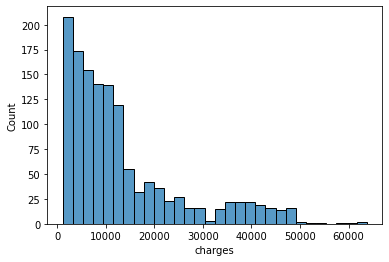

In [8]:
sns.histplot(d['charges'])
plt.show()

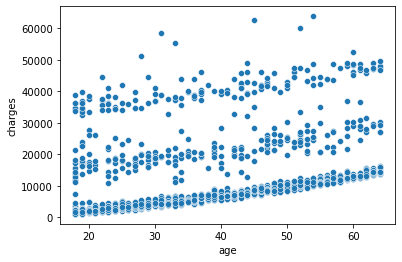

In [9]:
sns.scatterplot(x=d['age'],y=d['charges'])
plt.show()

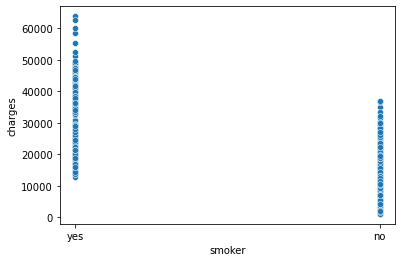

In [10]:
sns.scatterplot(x=d['smoker'],y=d['charges'])
plt.show()

In [11]:
dict1 = {'male':0,'female':1}
dict2 = {'yes':1,'no':0}

In [12]:
d['sex']=d['sex'].replace(dict1)
d['smoker']=d['smoker'].replace(dict2)

In [13]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [14]:
d= d.drop(columns=['region'])

In [15]:
d

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [16]:
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

<AxesSubplot:>

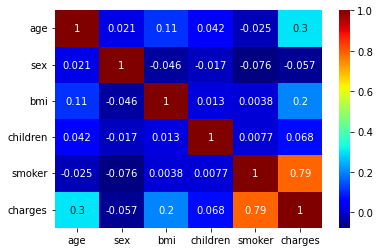

In [17]:
sns.heatmap(d.corr(),annot=True,cmap="jet")

In [18]:
X = d.drop(columns="charges")

In [19]:
y = d["charges"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7894790349867009

In [27]:
import pickle

In [28]:
file = open('model.pkl', 'wb')

In [29]:
pickle.dump("model.pkl", file)